In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

#Expensive Visualization Method Outline --------------------------------------------------------------------------

#Establish Domain and n points within
    
#Use shell commands to Modify & Run FENN at each x and y "point"

#Pull parameters from FENN simulation log

#Compute the Cost Function

#Interpolate between points

#Plots

file_path = "/home/ojc/Downloads/UTKCAP/FENN/simulation_log.txt"

'''
COMP = "g++ Networks.cpp -o FENN \
-I/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/include \
-I/usr/include/eigen3 \
-L/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib \
-Wl,-rpath,/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib \
-lhdf5_cpp -lhdf5"
'''

'\nCOMP = "g++ Networks.cpp -o FENN -I/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/include -I/usr/include/eigen3 -L/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib -Wl,-rpath,/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib -lhdf5_cpp -lhdf5"\n'

In [20]:
#Establish domain

EpsA_range=(1.0e-01, 1.0e-06)#Hi to Low
EpsR_range=(1.0e-01, 1.0e-06)

EpsA_points = []
EpsR_points = []

#tune accuracy - bigger n is more accurate
n = 7

EpsA_step = (max(EpsA_range)-min(EpsA_range))/n
EpsR_step = (max(EpsR_range)-min(EpsR_range))/n

for i in range(n):

    EpsA_points.append(min(EpsA_range)+(i*EpsA_step))
    EpsR_points.append(min(EpsR_range)+(i*EpsR_step))
    
print(EpsA_points) #USE TO PLOT
print(EpsR_points)


[1e-06, 0.014286571428571428, 0.02857214285714286, 0.04285771428571429, 0.057143285714285716, 0.07142885714285714, 0.08571442857142858]
[1e-06, 0.014286571428571428, 0.02857214285714286, 0.04285771428571429, 0.057143285714285716, 0.07142885714285714, 0.08571442857142858]


In [21]:
#Initialize
t_array = [None] * n * n
ERR_array = [None] * n * n

#Shell Commands

#Change working directory!

os.chdir('/home/ojc/Downloads/UTKCAP/FENN')

#Compile FENN
!g++ /home/ojc/Downloads/UTKCAP/FENN/Networks.cpp -o FENN \
    -I/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/include \
    -I/usr/include/eigen3 \
    -L/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib \
    -Wl,-rpath,/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib \
    -lhdf5_cpp -lhdf5
    
#Modify FENN

index = 0

for i in range(n):

    EpsA_value = EpsA_points[i]
    
    for j in range(n):
    
        EpsR_value = EpsR_points[j]
    
        !rm -f /home/ojc/Downloads/UTKCAP/FENN/simulation_log.txt

        !./FENN {EpsA_value} {EpsR_value} > /dev/null 2>&1
            
#Read from simulation_log.txt
    
        with open(file_path, 'r') as file:
            for line in file:
                if "Wall-clock time:" in line:
                    t_array[index] = line.split(":")[1].strip() 
                if "Accumulated Error:" in line:
                    ERR_array[index] = line.split(":")[1].strip() 
    
        '''!ls /home/ojc/Downloads/UTKCAP/FENN'''
                
        print(f'Iteration ({((n * i) + j + 1)}): Time = {t_array[index]}, Error = {ERR_array[index]}')

        index = index + 1


Iteration (1): Time = 1967658 microseconds, Error = 0.0728388
Iteration (2): Time = 447826 microseconds, Error = 79.2381
Iteration (3): Time = 435738 microseconds, Error = 158.48
Iteration (4): Time = 433135 microseconds, Error = 237.935
Iteration (5): Time = 446684 microseconds, Error = 317.316
Iteration (6): Time = 459802 microseconds, Error = 396.697
Iteration (7): Time = 454596 microseconds, Error = 476.078
Iteration (8): Time = 451753 microseconds, Error = 184.361
Iteration (9): Time = 436439 microseconds, Error = 263.742
Iteration (10): Time = 430436 microseconds, Error = 343.123
Iteration (11): Time = 435856 microseconds, Error = 422.504
Iteration (12): Time = 435498 microseconds, Error = 501.886
Iteration (13): Time = 456650 microseconds, Error = 581.267
Iteration (14): Time = 493346 microseconds, Error = 660.648
Iteration (15): Time = 519351 microseconds, Error = 368.931
Iteration (16): Time = 539163 microseconds, Error = 448.312
Iteration (17): Time = 556573 microseconds, Err

In [22]:
#Fixing time units

for i in range(n * n):
    t_value = t_array[i]
    
    if isinstance(t_value, float):
        continue  
    
    value, unit = t_value.split()
    
    if unit == 'microseconds':
        unit = 1.0e-6
    else:
        print('error in time units')
    
    value = float(value)
    t_array[i] = value * unit

print(t_array)

ERR_array = [float(x) for x in ERR_array]

print(t_array)
print(ERR_array)

[1.967658, 0.447826, 0.43573799999999996, 0.433135, 0.44668399999999997, 0.459802, 0.454596, 0.45175299999999996, 0.43643899999999997, 0.430436, 0.43585599999999997, 0.435498, 0.45665, 0.49334599999999995, 0.519351, 0.539163, 0.556573, 0.564689, 0.554711, 0.5635089999999999, 0.54192, 0.5424479999999999, 0.53848, 0.542574, 0.591772, 0.606273, 0.581402, 0.5816709999999999, 0.5894739999999999, 0.5849329999999999, 0.5721849999999999, 0.584718, 0.569754, 0.5803349999999999, 0.6136389999999999, 0.561206, 0.5396449999999999, 0.591585, 0.676252, 0.694846, 0.619008, 0.5968829999999999, 0.557972, 0.542505, 0.558661, 0.55521, 0.542657, 0.5312939999999999, 0.5176729999999999]
[1.967658, 0.447826, 0.43573799999999996, 0.433135, 0.44668399999999997, 0.459802, 0.454596, 0.45175299999999996, 0.43643899999999997, 0.430436, 0.43585599999999997, 0.435498, 0.45665, 0.49334599999999995, 0.519351, 0.539163, 0.556573, 0.564689, 0.554711, 0.5635089999999999, 0.54192, 0.5424479999999999, 0.53848, 0.542574, 0.5

In [23]:
#Compute the Cost Function

Cost_array = [[None for _ in range(n)] for _ in range(n)]

for i in range(n):
    
    for j in range (n):
        
        Cost_array[i][j] = np.sqrt(t_array[i]**2 + ERR_array[j]**2)

print (Cost_array) # USE TO PLOT

[[1.969005712472526, 79.26252689395515, 158.4922145659053, 237.94313586024072, 317.32210060757654, 396.70187986321037, 476.0820662049821], [0.4537109399843032, 79.23936546777918, 158.48063272250735, 237.9354214343175, 317.3163160067983, 396.6972527723456, 476.07821062523567], [0.44178399182116135, 79.23929807371242, 158.4805990258891, 237.93539899015585, 317.31629917734233, 396.697239310541, 476.0781994080433], [0.43921682459855743, 79.2392838025321, 158.4805918903896, 237.93539423744468, 317.3162956135852, 396.6972364599081, 476.078197032723], [0.4525837896361733, 79.23935902192707, 158.4806294996201, 237.9354192876627, 317.3163143971577, 396.69725148480154, 476.0782095523758], [0.4655355732803241, 79.23943405583614, 158.48066701613544, 237.93544427612966, 317.31633313442785, 396.6972664726582, 476.0782220411675], [0.4603944113490519, 79.23940401803395, 158.48065199740697, 237.93543427266823, 317.316325633465, 396.6972604726723, 476.0782170416151]]


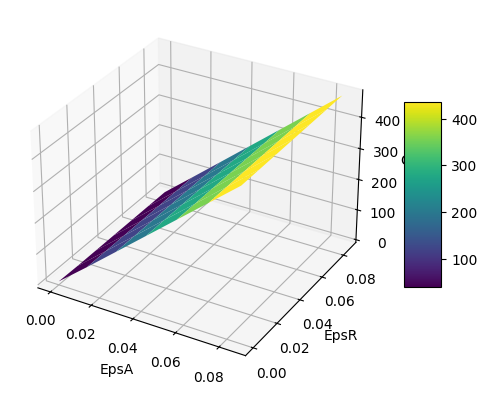

In [24]:
import matplotlib.pyplot as plt
import numpy as np

Cost_array_np = np.array(Cost_array)

# Create 2D grids of EpsA and EpsR points
EpsA_grid, EpsR_grid = np.meshgrid(EpsA_points, EpsR_points)

# Create the figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(EpsA_grid, EpsR_grid, Cost_array_np, cmap='viridis')

# Set axis labels
ax.set_xlabel('EpsA')
ax.set_ylabel('EpsR')
ax.set_zlabel('Cost')

fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)

plt.show()


In [25]:
#SAVING

import json

data = {
    "EpsA_points": EpsA_points,
    "EpsR_points": EpsR_points,
    "ERR_array": ERR_array,
    "t_array": t_array,
    "ERR_array": ERR_array,
    "Cost_array": Cost_array
}

with open('data.json', 'w') as f:
    json.dump(data, f)
